___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [89]:
data = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [90]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

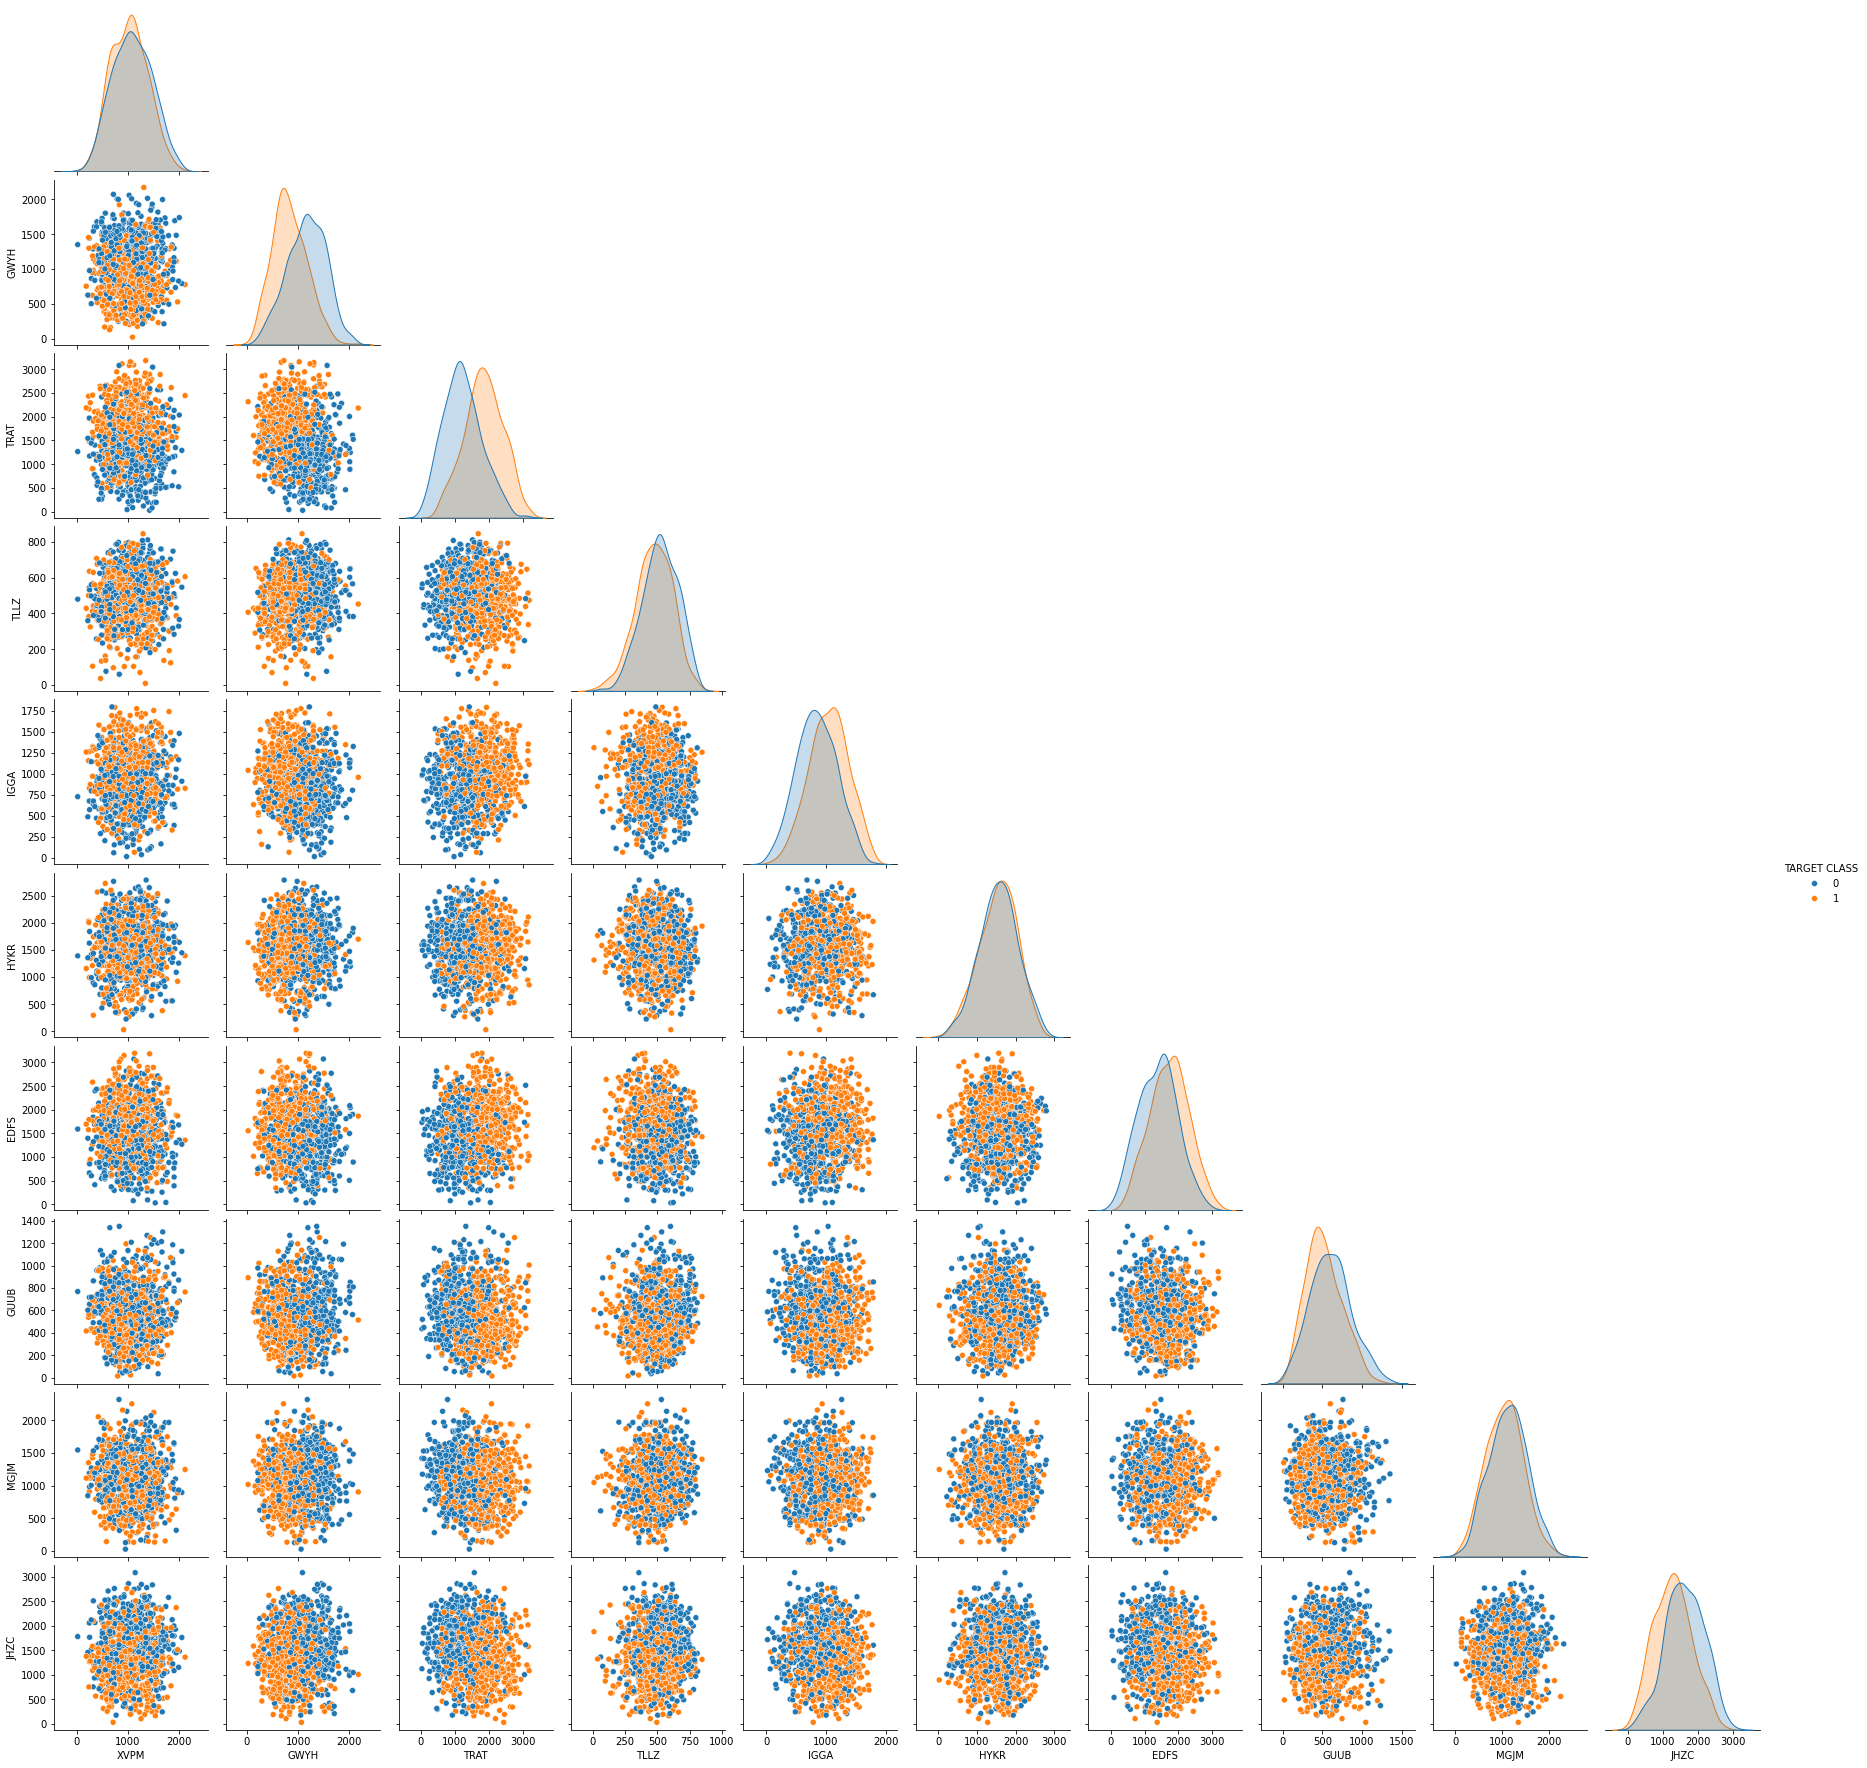

In [91]:
sns.pairplot(data=data, hue='TARGET CLASS', corner=True)

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

** Create a StandardScaler() object called scaler.**

** Fit scaler to the features.**

**Use the .transform() method to transform the features to a scaled version.**

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit(data.drop(['TARGET CLASS'], axis = 1))
scaled_df = pd.DataFrame(scaler.transform(data.drop(['TARGET CLASS'], axis = 1)), columns=data.columns[:-1])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [93]:
scaled_df.head(5)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_df, data['TARGET CLASS'], test_size=0.33, random_state=40)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [95]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

**Fit this KNN model to the training data.**

In [96]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [97]:
y_predicted = knn1.predict(X_test)

** Create a confusion matrix and classification report.**

In [98]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_predicted)
classification_report(y_test, y_predicted)

'              precision    recall  f1-score   support\n\n           0       0.71      0.69      0.70       163\n           1       0.71      0.72      0.71       167\n\n    accuracy                           0.71       330\n   macro avg       0.71      0.71      0.71       330\nweighted avg       0.71      0.71      0.71       330\n'

# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

**Now create the following plot using the information from your for loop.**

In [99]:
errors = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predicted_k = knn.predict(X_test)
    errors.append(np.mean(y_predicted_k != y_test))

Text(0, 0.5, 'Error Rate')

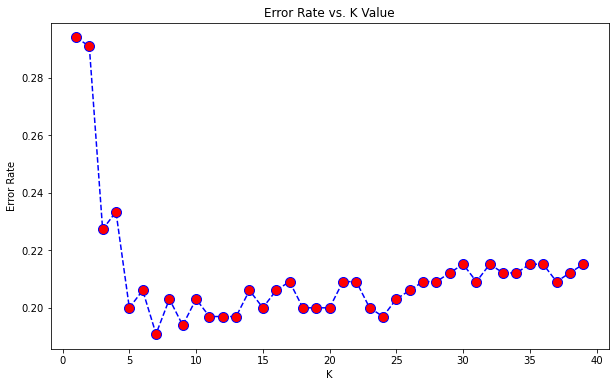

In [100]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 40), errors, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [101]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_predicted_15 = knn.predict(X_test)
print(confusion_matrix(y_test, y_predicted_15))
print(classification_report(y_test, y_predicted))

[[126  37]
 [ 29 138]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       163
           1       0.71      0.72      0.71       167

    accuracy                           0.71       330
   macro avg       0.71      0.71      0.71       330
weighted avg       0.71      0.71      0.71       330



In [102]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
y_predicted_30 = knn.predict(X_test)
print(confusion_matrix(y_test, y_predicted_30))
print(classification_report(y_test, y_predicted))

[[123  40]
 [ 31 136]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       163
           1       0.71      0.72      0.71       167

    accuracy                           0.71       330
   macro avg       0.71      0.71      0.71       330
weighted avg       0.71      0.71      0.71       330



# Great Job!